In [37]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits(n_class=6)
X, y = digits.data, digits.target

n_samples, n_features = X.shape
n_classes = len(np.unique(y))

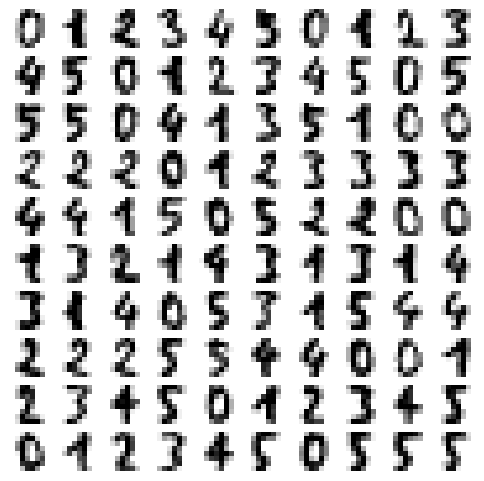

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.show

## Single class implement

In [104]:
def net_input(X, weight, bias):
    return X.dot(weight.T) + bias


def sigmoid(net_input):
    return 1 / (1 + np.exp(-net_input))


def logloss(y_predict, y_target):
    logloss = -np.mean( y_target * np.log(y_predict) + (1 - y_target) * np.log(1 - y_predict) )
    return logloss


def fit(X, y, iter, learning_rate):
    
    w_list = []
    b_list = []
    
    n_samples, n_features = X.shape
    n_classes = len(np.unique(y))
    
    y_onehot = get_onehot(y)

    w = np.random.uniform(0, .1, [n_classes, n_features])
    b = np.random.uniform(0, .1, [n_classes])

    for i in range(iter):
        
        y_predict = predict(X, w, b)
        loss = logloss(y_predict, y_onehot)
        print(f'Iter: {i}, Loss: {loss}')
        
        error = y_predict - y_onehot

        w -= learning_rate * X.T.dot(error).T   # [features, samples] dot [samples, classes] = [features, classes]
        b -= learning_rate * np.average(error, axis=0)
        
        w_list.append(w)
        b_list.append(b)

    return w_list, b_list
    

def predict(X, w, b):
    
    z = net_input(X, w, b)
    y_predict = sigmoid(z)
    
    return y_predict


# Aux function
def get_onehot(y):
    n_classes = len(np.unique(y))
    n_samples = len(y)
    
    y_onehot = np.zeros([n_samples, n_classes])
    for i, val in enumerate(y):
        y_onehot[i, val] = 1
    return y_onehot


def onehot_to_label(y_onehot):
    y_pred = []
    
    for row in y_onehot:
        for i, col in enumerate(row):
            if col == 1:
                y_pred.append(i)
    return y_pred


def to_classlabel(z):
    return z.argmax(axis = 1)

In [105]:
# Single class
w_list, b_list = fit(X, y, 50, 0.00001)

Iter: 0, Loss: 12.31555663625587
Iter: 1, Loss: 1.4142348280756973
Iter: 2, Loss: 0.5526707577521576
Iter: 3, Loss: 0.33986205087070037
Iter: 4, Loss: 0.45770601090390517
Iter: 5, Loss: 0.2702372447351822
Iter: 6, Loss: 0.3458820925310423
Iter: 7, Loss: 0.21835970258078144
Iter: 8, Loss: 0.25896877215769293
Iter: 9, Loss: 0.16560714723263886
Iter: 10, Loss: 0.17119045149770595
Iter: 11, Loss: 0.14312672077138736
Iter: 12, Loss: 0.14336850821731048
Iter: 13, Loss: 0.12426421804882075
Iter: 14, Loss: 0.12092301746533536
Iter: 15, Loss: 0.11034472833834673
Iter: 16, Loss: 0.1063621648180092
Iter: 17, Loss: 0.10057593355736254
Iter: 18, Loss: 0.0972305935910661
Iter: 19, Loss: 0.09378857274224404
Iter: 20, Loss: 0.09122438661194109
Iter: 21, Loss: 0.0888712150070177
Iter: 22, Loss: 0.08686013508915143
Iter: 23, Loss: 0.08502482107458811
Iter: 24, Loss: 0.0833520239955247
Iter: 25, Loss: 0.08179598532234462
Iter: 26, Loss: 0.08033901322238288
Iter: 27, Loss: 0.07896513740324872
Iter: 28, Lo

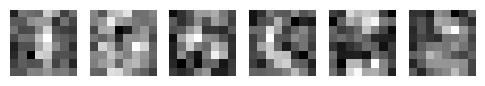

In [109]:
# Explainable
fig, axs = plt.subplots(nrows=1, ncols=n_classes, figsize=(6, 6))

for idx, ax in enumerate(axs.ravel()):
    ax.imshow(w_list[0][idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.show

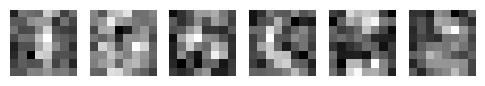

In [110]:
# Explainable
fig, axs = plt.subplots(nrows=1, ncols=n_classes, figsize=(6, 6))

for idx, ax in enumerate(axs.ravel()):
    ax.imshow(w_list[49][idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.show

$ \hat{y} = w * x $

$ L(\hat{y}, y) = \frac{1}{m} \sum(\hat{y} - y)^2 $

$ [f(g(x))]' = f'(g(x)) * g(x)' $

In [281]:
y_onehot = get_onehot(y)
weight = np.random.uniform(0, .01, [n_classes, n_features])
bias = np.random.uniform(0, .01, [n_classes])

In [282]:
iter = 5
for i in range(0, iter):
    new_weight, new_bias = loss(X, activation(net_input(X, weight, bias)), y_onehot)
    weight = weight - new_weight
    bias = bias - new_bias

0.6622899350695443
-0.16666666666666666
-0.16666666666666666
-0.16666666666666666
-0.13665743305632502


/var/folders/3t/xfpgj4cx36x99cwhqh55n25w0000gp/T/ipykernel_19501/3803820047.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-net_input))


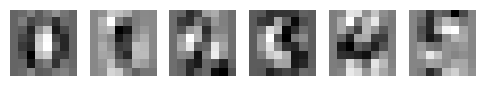

In [283]:
# Explainable
fig, axs = plt.subplots(nrows=1, ncols=n_classes, figsize=(6, 6))

for idx, ax in enumerate(axs.ravel()):
    ax.imshow(weight[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.show

In [284]:
# Predict, Problem predict 2 label in onr hot
y_onehot_pred = activation(net_input(X, weight, bias))
y_onehot_pred

/var/folders/3t/xfpgj4cx36x99cwhqh55n25w0000gp/T/ipykernel_19501/3803820047.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-net_input))


array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.]])

In [350]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))


def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred))


def update_weights_biases(X, y, weight, bias, learning_rate):
    
    m = X.shape[0]  # Number of samples

    # Forward pass
    z = net_input(X, weight, bias)
    y_pred = softmax(z)
    loss = cross_entropy_loss(y, y_pred)

    # Backward pass
    error = y - y_pred
    dw = X.T.dot(error).T / m
    db = np.sum(error, axis=0) / m

    # Update weight and bias
    weight -= learning_rate * dw
    bias -= learning_rate * db

    return weight, bias, loss

In [351]:
y_onehot = get_onehot(y)
weight = np.random.uniform(.01, .1, [n_classes, n_features])
bias = np.random.uniform(.01, .1, [n_classes])

In [352]:
iter = 100
for _ in range(iter):
    weight, bias, loss = update_weights_biases(X, y_onehot, weight, bias, 0.001)
    print(loss)

12536.281221527814
12513.35199856618
12496.628694467472
12486.151673697113
12481.946077868775
12484.021357376701
12492.370930271623
12506.972005885975
12527.785608887598
12554.756833661144
12587.815349563138
12626.876165508575
12671.840648703608
12722.59777849851
12779.025603645216
12840.992860865565
12908.360705406847
12980.984500616001
13058.715613524731
13141.403166660555
13228.895702164558
13321.042722024677
13417.696076995398
13518.711185793221
13623.948074775364
13733.272236033528
13846.555308343963
13963.675590554309
14084.518400737488
14208.976296889525
14336.949176247927
14468.344270653906
14603.076054981964
14741.066084713573
14882.242777417317
15026.541151368434
15173.902532919226
15324.274242612024
15477.60926847575
15633.865933510027
15793.007563063378
15955.002156665427
16119.822067877956
16287.443694878566
16457.8471837717
16631.016146019378
16806.93739088179
16985.60067333911
17166.998457614423
17351.125696119092
17537.979623382733
17727.559564299554
17919.86675581198
1

## Performance Evaluation

### Confusion Matrix
Precision = TP(TP / FP)

Recall = TP(TP / FN)

Accuracy = (TP + TN) / Total

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)